In [71]:
import os
import csv
import matplotlib.pyplot as plt
from random import random
from random import randint

samples = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)
        print(line)

from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.33)

print(len(train_samples))

import cv2
import numpy as np
import sklearn

%matplotlib inline

def generator_train(samples, batch_size=16):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                imagetotake = randint(0,0)
                image_name = 'data/IMG/'+batch_sample[imagetotake].split('/')[-1]
                image = cv2.imread(image_name)
                angle = float(batch_sample[3])
                
                #image = np.array(image)
                
                print(image_name)
                print(angle)
                
                plt.figure(figsize=(8,8))
                plt.imshow(image)
                plt.show()
                
                if(imagetotake == 1):
                    angle += 0.2
                if(imagetotake == 2):
                    angle -= 0.2
                    
                if(randint(0,1) == 0):
                    gamma = 0.4 + random() * 1.2
                    invGamma = 1.0 / gamma
                    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
                    image = cv2.LUT(image, table)
                    
                if(randint(0,1) == 0):
                    brightness_change = 0.4 + random()*1.2
                    image = np.array(image)
                    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
                    image[:,:,2] = image[:,:,2]*brightness_change
                    image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
                    
                if(randint(0,1) == 0):
                    saturation_change = 0.4 + 1.2*random()
                    image = np.array(image)
                    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
                    image[:,:,1] = image[:,:,1]*saturation_change
                    image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
                
                if(randint(0,1) == 0):
                    lightness_change = 0.4 + 1.2*random()
                    image = np.array(image)
                    image = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
                    image[:,:,1] = image[:,:,1]*lightness_change
                    image = cv2.cvtColor(image,cv2.COLOR_HLS2RGB)
                    
                if(randint(0,1) == 0):    
                    image = np.array(image)
                    rows,cols,rgb = image.shape
                    steer = -0.5
                    rand_for_x = random()
                    translate_y = -5 + random()*10
                    translate_x = -30 + rand_for_x*60
                    M = np.float32([[1,0,translate_x],[0,1,translate_y]])
                    image = cv2.warpAffine(image,M,(cols,rows))
                    angle = (steer+(rand_for_x-0.5)*0.2)
                 
                if(randint(0,1) == 0): 
                    angle = -angle
                    image = np.array(image)
                    image = cv2.flip(image,1)
                    
                if(randint(0,0) == 0):      
                    image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
                    max_x = 160
                    max_y = 320
                    if(randint(0,1) == 0):
                        i_1 = (0,0)
                        i_2 = (0,max_y)
                        i_3 = (random()*max_x,max_y)
                        i_4 = (random()*max_x,0)
                    else:
                        i_1 = (random()*max_x,0)
                        i_2 = (random()*max_x,max_y)
                        i_3 = (max_x,max_y)
                        i_4 = (max_x,0)

                    vertices = np.array([[i_1,i_2,i_3,i_4]], dtype = np.int32)         
                    random_brightness = 0.0 + random()*1.2
                    mask = np.zeros_like(image)
                    ignore_mask_color = [0,0,255]
                    cv2.fillPoly(mask, vertices, ignore_mask_color)
                    indices = mask[:,:,2] == 255
                    image[:,:,2][indices] = image[:,:,2][indices]*random_brightness
                    image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)

                plt.figure(figsize=(8,8))
                plt.imshow(image)
                plt.show()    
                
                images.append(image)
                angles.append(angle)

            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)
            
def generator_valid(samples, batch_size=16):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                imagetotake = randint(0,2)
                image_name = 'data/IMG/'+batch_sample[imagetotake].split('/')[-1]
                image = cv2.imread(image_name)
                angle = float(batch_sample[3])
                if(imagetotake == 1):
                    angle += 0.2
                if(imagetotake == 2):
                    angle -= 0.2

                images.append(image)
                angles.append(angle)

            X_valid = np.array(images)
            y_valid = np.array(angles)
            yield sklearn.utils.shuffle(X_valid, y_valid)


train_generator = generator_train(train_samples, batch_size=16)
validation_generator = generator_valid(validation_samples, batch_size=16)

['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', '0', '0', '0', '22.14829']
['IMG/center_2016_12_01_13_30_48_404.jpg', ' IMG/left_2016_12_01_13_30_48_404.jpg', ' IMG/right_2016_12_01_13_30_48_404.jpg', '0', '0', '0', '21.87963']
['IMG/center_2016_12_01_13_31_12_937.jpg', ' IMG/left_2016_12_01_13_31_12_937.jpg', ' IMG/right_2016_12_01_13_31_12_937.jpg', '0', '0', '0', '1.453011']
['IMG/center_2016_12_01_13_31_13_037.jpg', ' IMG/left_2016_12_01_13_31_13_037.jpg', ' IMG/right_2016_12_01_13_31_13_037.jpg', '0', '0', '0', '1.438419']
['IMG/center_2016_12_01_13_31_13_177.jpg', ' IMG/left_2016_12_01_13_31_13_177.jpg', ' IMG/right_2016_12_01_13_31_13_177.jpg', '0', '0', '0', '1.418236']
['IMG/center_2016_12_01_13_31_13_279.jpg', ' IMG/left_2016_12_01_13_31_13_279.jpg', ' IMG/right_2016_12_01_13_31_13_279.jpg', '0', '0', '0', '1.403993']
['IMG/center

data/IMG/center_2016_12_01_13_41_17_922.jpg
0.0


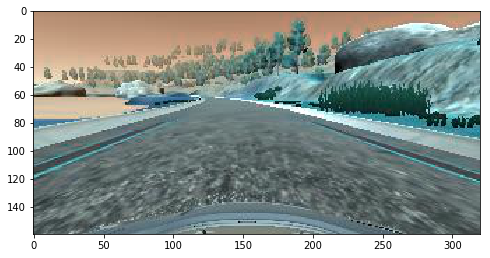

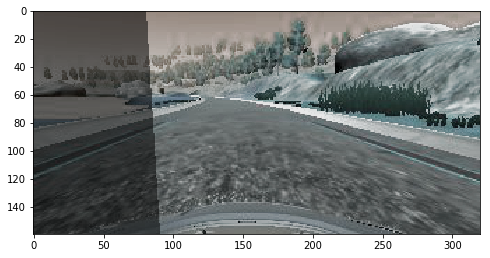

data/IMG/center_2016_12_01_13_34_30_742.jpg
0.0


In [ ]:
images,angles = next(train_generator)